In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
from od.model.faster_rcnn import build_fpn_resnet50_faster_rcnn

model_faster_rcnn = build_fpn_resnet50_faster_rcnn(80, 1)
model_faster_rcnn.load_weights('./final_weights.h5')

In [4]:
from od.model.post_processing import post_process_fast_rcnn_boxes

import tensorflow as tf
import tensorflow_datasets as tfds
from od.dataset.preprocessing import preprocess, expand_dims_for_single_batch

ds_train, ds_info = tfds.load(name="coco/2017", split="train", shuffle_files=True, with_info=True)
ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.map(expand_dims_for_single_batch, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

classes = ds_info.features['objects']['label'].names


In [19]:
from od.utils.drawing import BoxDrawer

drawer = BoxDrawer(classes)

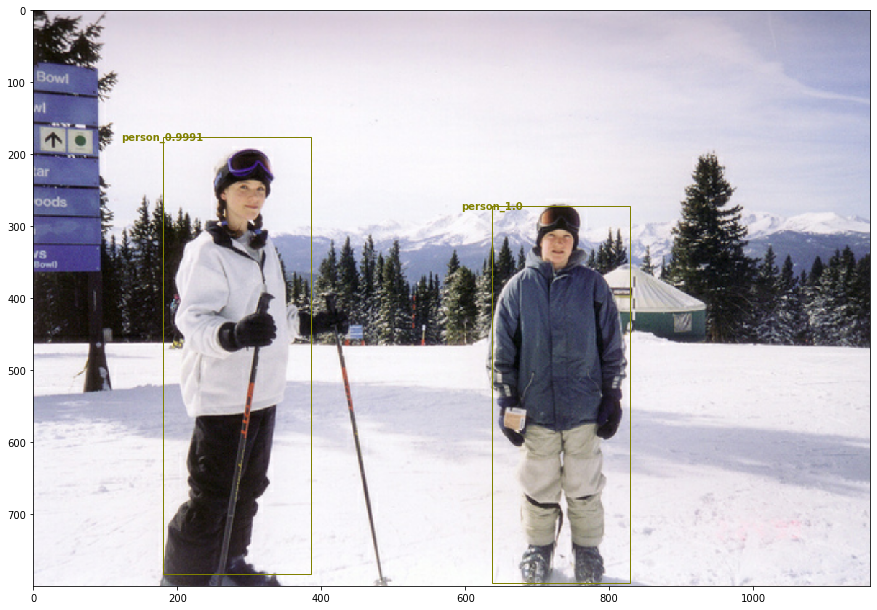

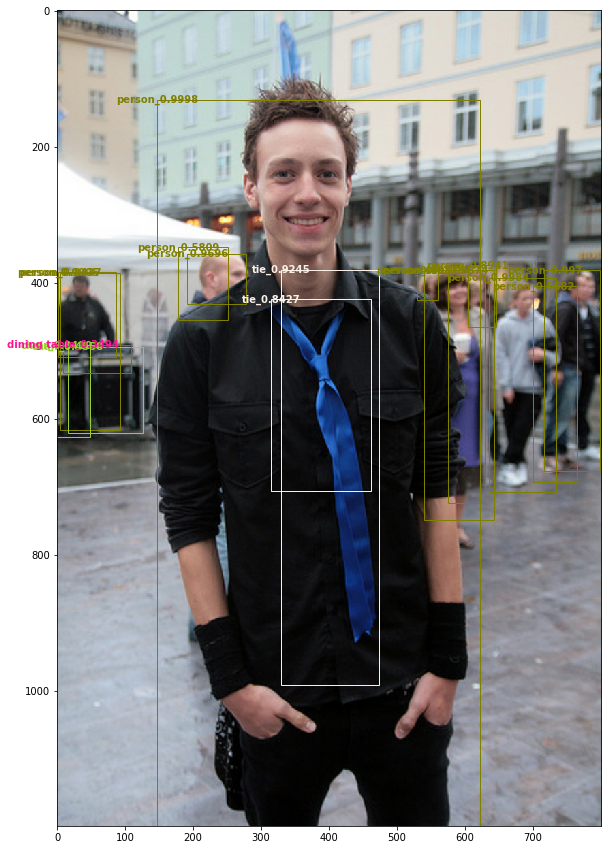

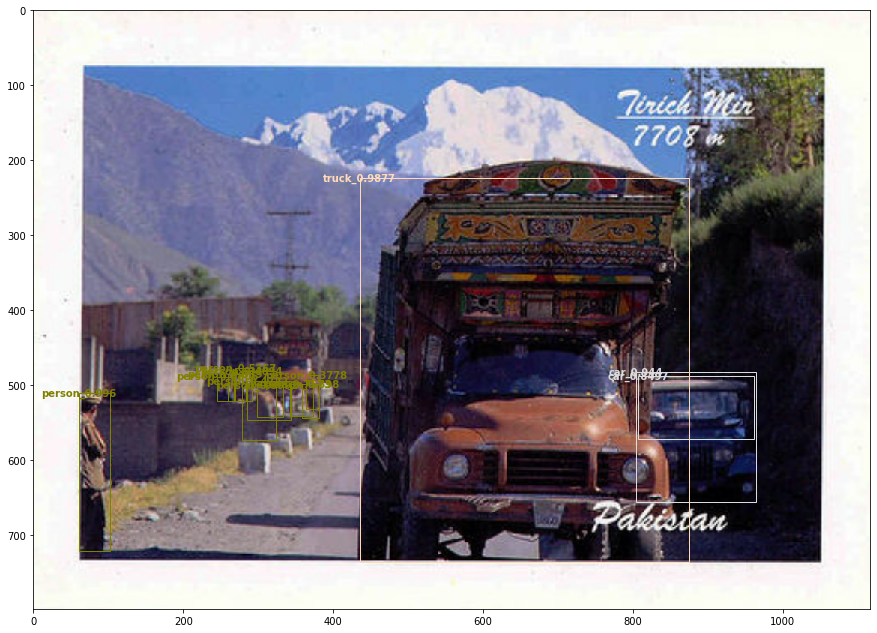

In [20]:
for i, example in enumerate(ds_train):
    classification_pred, localization_pred, anchors = model_faster_rcnn.predict(example)
    boxes, scores, labels, valid_detections = post_process_fast_rcnn_boxes(classification_pred, localization_pred, anchors,
                                               example['images_information'], 80 + 1)
    
    drawer(example['images'],boxes,labels=labels,scores=scores,
           num_valid_detections=valid_detections,
                    resize=True)
    if i == 2:
        break